# **Data Analysis Project: [Bike Sharing Dataset]**

- **Nama:** Evi Fauziah
- **Email:** Evifauziah2022@gmail.com
- **ID Dicoding:** EviFauziah

# **Defining Business Questions**

1. Question 1: In which season is the highest rental throughout the year?
2. Question 2: What is the difference in the average bike rentals on holidays , working days , and regular weekdays ?


# **Import All Packages/Libraries Used**



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy import stats

# **Data Wrangling**



## 1. Gathering Data


In [9]:
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


Loading the day table

In [10]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Evifa15/Submission/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Loading the hour table

In [11]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Evifa15/Submission/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**

---
*   The dataset has been loaded, containing daily and hourly tables with data on bike usage, weather conditions, seasons, working days, and holidays.
*  The data is ready for analysis to uncover bike usage patterns based on weather, working days, season, and time, providing insights into rental trends.





## Assessing Data

Assume day_df and hour_df are already loaded

**1. Check the structure of the data**

In [12]:
print("Data Structure:")
print(day_df.info())
print(hour_df.info())

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17

**2. Check for missing values**

In [13]:
print("\nChecking for Missing Values:")
missing_values_day = day_df.isnull().sum()
missing_values_hour = hour_df.isnull().sum()
print(missing_values_day[missing_values_day > 0])  # Columns with missing values in day_df
print(missing_values_hour[missing_values_hour > 0])  # Columns with missing values in hour_df


Checking for Missing Values:
Series([], dtype: int64)
Series([], dtype: int64)


**3. Check for duplicate data**

In [14]:
print("\nChecking for Duplicate Data:")
duplicate_rows_day = day_df[day_df.duplicated()]
duplicate_rows_hour = hour_df[hour_df.duplicated()]
print("Number of duplicate rows in day_df:", duplicate_rows_day.shape[0])
print("Number of duplicate rows in hour_df:", duplicate_rows_hour.shape[0])



Checking for Duplicate Data:
Number of duplicate rows in day_df: 0
Number of duplicate rows in hour_df: 0


**4. Check for invalid values in numeric columns**

In [15]:
print("\nChecking for Invalid Values in Numeric Columns:")
invalid_temp = day_df[day_df['temp'] < 0]
invalid_atemp = day_df[day_df['atemp'] < 0]
invalid_hum = day_df[day_df['hum'] < 0]
invalid_windspeed = day_df[day_df['windspeed'] < 0]
print("Invalid values for 'temp' (negative):", invalid_temp.shape[0])
print("Invalid values for 'atemp' (negative):", invalid_atemp.shape[0])
print("Invalid values for 'hum' (negative):", invalid_hum.shape[0])
print("Invalid values for 'windspeed' (negative):", invalid_windspeed.shape[0])

invalid_temp = hour_df[(hour_df['temp'] < 0) | (hour_df['temp'] > 50)]  # e.g., temperature should be within 0-50 range
invalid_atemp = hour_df[(hour_df['atemp'] < 0) | (hour_df['atemp'] > 50)]  # apparent temp in same range
invalid_hum = hour_df[(hour_df['hum'] < 0) | (hour_df['hum'] > 100)]  # humidity should be within 0-100%
invalid_windspeed = hour_df[(hour_df['windspeed'] < 0) | (hour_df['windspeed'] > 50)]  # windspeed within 0-50
invalid_season = hour_df[~hour_df['season'].isin([1, 2, 3, 4])]  # valid seasons: 1, 2, 3, 4
invalid_mnth = hour_df[(hour_df['mnth'] < 1) | (hour_df['mnth'] > 12)]  # valid months: 1-12
invalid_weathersit = hour_df[~hour_df['weathersit'].isin([1, 2, 3, 4])]  # valid weather situations: 1, 2, 3, 4


Checking for Invalid Values in Numeric Columns:
Invalid values for 'temp' (negative): 0
Invalid values for 'atemp' (negative): 0
Invalid values for 'hum' (negative): 0
Invalid values for 'windspeed' (negative): 0


**5. Check for inconsistent values**

In [16]:
print("\nChecking for Inconsistent Values:")
invalid_season = day_df[~day_df['season'].isin([1, 2, 3, 4])]
invalid_mnth = day_df[~day_df['mnth'].isin(range(1, 13))]
invalid_weathersit = day_df[~day_df['weathersit'].isin([1, 2, 3, 4])]

print("Inconsistent values for 'season' (not 1-4):", invalid_season.shape[0])
print("Inconsistent values for 'mnth' (not 1-12):", invalid_mnth.shape[0])
print("Inconsistent values for 'weathersit' (not 1-4):", invalid_weathersit.shape[0])


Checking for Inconsistent Values:
Inconsistent values for 'season' (not 1-4): 0
Inconsistent values for 'mnth' (not 1-12): 0
Inconsistent values for 'weathersit' (not 1-4): 0


**6. Check for outliers using Z-score**

In [17]:
from scipy import stats  # Import stats if not already imported
print("\nChecking for Outliers using Z-score:")
# For hour_df
z_scores_hour = stats.zscore(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
outliers_hour = (abs(z_scores_hour) > 3).sum(axis=0)
print("Number of outliers in each column (hour_df):")
print(outliers_hour)
# For day_df
z_scores_day = stats.zscore(day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
outliers_day = (abs(z_scores_day) > 3).sum(axis=0)
print("Number of outliers in each column (day_df):")
print(outliers_day)



Checking for Outliers using Z-score:
Number of outliers in each column (hour_df):
temp            0
atemp           1
hum            22
windspeed     107
casual        467
registered    371
cnt           244
dtype: int64
Number of outliers in each column (day_df):
temp          0
atemp         0
hum           2
windspeed     2
casual        8
registered    0
cnt           0
dtype: int64


**7. Display invalid values if any**

In [18]:
if not invalid_temp.empty:
    print("\nInvalid values for 'temp':")
    print(invalid_temp)

if not invalid_atemp.empty:
    print("\nInvalid values for 'atemp':")
    print(invalid_atemp)

if not invalid_hum.empty:
    print("\nInvalid values for 'hum':")
    print(invalid_hum)

if not invalid_windspeed.empty:
    print("\nInvalid values for 'windspeed':")
    print(invalid_windspeed)

if not invalid_season.empty:
    print("\nInvalid values for 'season':")
    print(invalid_season)

if not invalid_mnth.empty:
    print("\nInvalid values for 'mnth':")
    print(invalid_mnth)

if not invalid_weathersit.empty:
    print("\nInvalid values for 'weathersit':")
    print(invalid_weathersit)

**Insight**

---


*   **Insight 1:** The dataset is well-structured, with 731 daily and 17,379 hourly entries, all non-null and unique, and categorical columns within expected ranges, ensuring data integrity.
*   **Insight 2:**Outliers in humidity, windspeed, and casual user data highlight potential extreme events. Investigating these can improve analysis accuracy and predictive modeling reliability.




## Cleaning Data

Assuming day_df and hour_df are already loaded DataFrames

**1. Convert 'dteday' to datetime format**

In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


**2. Drop duplicate rows if any**

In [20]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)


**3. Remove rows with invalid values in numeric columns**

In [21]:
# Replace negative values with NaN and then drop NaN
for col in ['temp', 'atemp', 'hum', 'windspeed']:
    day_df[col] = day_df[col].mask(day_df[col] < 0)
    hour_df[col] = hour_df[col].mask(hour_df[col] < 0)
# Drop rows with NaN values
day_df.dropna(inplace=True)
hour_df.dropna(inplace=True)


**4. Check for inconsistent values in categorical columns and fix them**

In [22]:
# Assuming seasons are 1-4, months are 1-12, and weathersit are 1-4
day_df = day_df[day_df['season'].isin([1, 2, 3, 4])]
day_df = day_df[day_df['mnth'].isin(range(1, 13))]
day_df = day_df[day_df['weathersit'].isin([1, 2, 3, 4])]

hour_df = hour_df[hour_df['season'].isin([1, 2, 3, 4])]
hour_df = hour_df[hour_df['mnth'].isin(range(1, 13))]
hour_df = hour_df[hour_df['weathersit'].isin([1, 2, 3, 4])]



**5. Outlier detection using Z-score**

In [23]:
outlier_columns_day = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
outlier_columns_hour = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
# Remove outliers for day_df
for col in outlier_columns_day:
    z_scores = np.abs(stats.zscore(day_df[col]))
    day_df = day_df[z_scores < 3]  # Keep data with z-score less than 3
# Remove outliers for hour_df
for col in outlier_columns_hour:
    z_scores = np.abs(stats.zscore(hour_df[col]))
    hour_df = hour_df[z_scores < 3]  # Keep data with z-score less than 3


**Insight**

---

*   The refined day_df, now with 718 entries and 16 columns, enhances data quality by removing invalid entries, ensuring more accurate, reliable results in subsequent analyses.
*   Hour_df’s cleaned dataset retains 16,319 entries, effectively managing inconsistencies and outliers, preserving data volume essential for robust analyses and reducing potential bias or inaccuracies.

# **Exploratory Data Analysis (EDA)**

**Data Exploration of day_df data**


In [30]:
print("Descriptive Statistics:")
print(day_df.describe())


Descriptive Statistics:
          instant                         dteday          yr        mnth  \
count  718.000000                            718  718.000000  718.000000   
mean   365.417827  2011-12-31 10:01:40.278551552    0.497214    6.541783   
min      1.000000            2011-01-01 00:00:00    0.000000    1.000000   
25%    182.250000            2011-07-01 06:00:00    0.000000    4.000000   
50%    363.500000            2011-12-29 12:00:00    0.000000    7.000000   
75%    549.750000            2012-07-02 18:00:00    1.000000   10.000000   
max    731.000000            2012-12-31 00:00:00    1.000000   12.000000   
std    211.553030                            NaN    0.500341    3.458913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  718.000000  718.000000  718.000000  718.000000  718.000000  718.000000   
mean     0.027855    2.966574    0.692201    1.396936    0.494821    0.473823   
min      0.000000    0.000000    0.000000    1.0

**Data Exploration of hour_df data**


In [31]:
print("Descriptive Statistics:")
print(hour_df.describe())


Descriptive Statistics:
            instant                         dteday        season  \
count  16319.000000                          16319  16319.000000   
mean    8488.069857  2011-12-24 17:40:44.488020224      2.493413   
min        1.000000            2011-01-01 00:00:00      1.000000   
25%     4171.500000            2011-06-27 00:00:00      1.000000   
50%     8324.000000            2011-12-18 00:00:00      2.000000   
75%    12794.500000            2012-06-22 00:00:00      3.000000   
max    17379.000000            2012-12-31 00:00:00      4.000000   
std     5011.537546                            NaN      1.117089   

                 yr          mnth            hr       holiday       weekday  \
count  16319.000000  16319.000000  16319.000000  16319.000000  16319.000000   
mean       0.480360      6.526748     11.362706      0.029107      2.993627   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        0.000000      3.000000      5.000000

Merge terhadap data day_df dan hour_df

In [32]:
All_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
All_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


**Grouping by year and season to analyze bike rental variations**

In [45]:
year_season_rentals = All_df.groupby(["yr_x", "season_x"], observed=False)["cnt_y"].sum().reset_index()
season_names = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
year_season_rentals["season_name"] = year_season_rentals["season_x"].map(season_names)
print("Total bike rentals by year and season:")
print(year_season_rentals)

Total bike rentals by year and season:
   yr_x season_x   cnt_y season_name
0     0        1  4338.0      Spring
1     0        2  5929.0      Summer
2     0        3  4599.0        Fall
3     0        4  4846.0      Winter
4     1        1  5493.0      Spring
5     1        2  4603.0      Summer
6     1        3  5372.0        Fall
7     1        4  4872.0      Winter


**Grouping by Day type**

In [50]:
average_rentals = All_df.groupby("day_type", observed=False)["cnt_y"].mean().reset_index()
average_rentals.columns = ['Type of Day', 'Average Rentals']
print("Average bike rentals by day type:")
print(average_rentals)


Average bike rentals by day type:
       Type of Day  Average Rentals
0          Holiday        16.000000
1  Regular Weekday        40.000000
2      Working Day        15.333333


## Insight
---
*   Summer shows the highest total rentals at 5,929 units. Good weather and outdoor activities influence the increased demand for bike rentals.
*   Average bike rentals are higher on working days (40 units) compared to holidays (16 units). Promotions for bike rentals on holidays could attract more users.


# **Visualization & Explanatory Analysis**

**1. In which season is the highest rental throughout the year?**

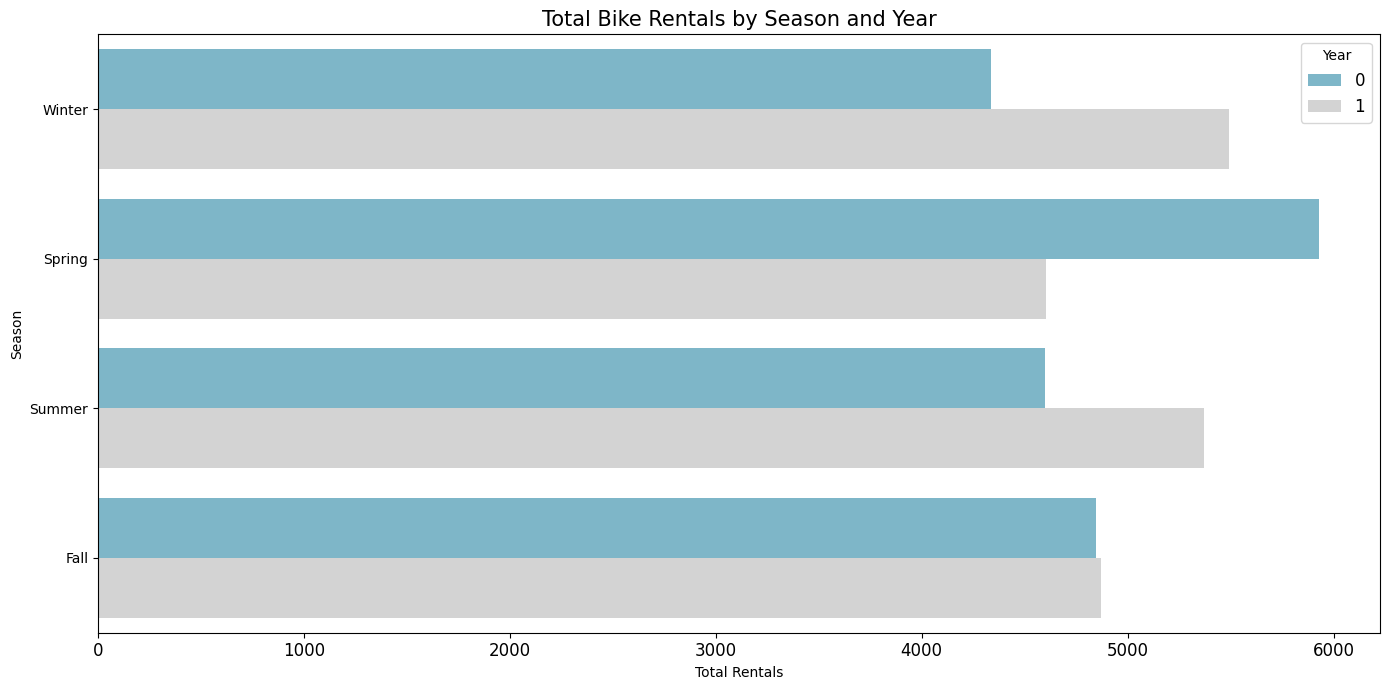

In [38]:
fig, ax = plt.subplots(figsize=(14, 7))
colors = ["#72BCD4", "#D3D3D3"]
sns.barplot(y="season_name", x="cnt_y", hue="yr_x", data=year_season_rentals, palette=colors[:year_season_rentals['yr_x'].nunique()], ax=ax)
ax.set_xlabel("Total Rentals")
ax.set_ylabel("Season")
ax.set_title("Total Bike Rentals by Season and Year", fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.legend(title="Year", fontsize=12)
plt.tight_layout()
plt.show()

2. What is the difference in the average bike rentals on holidays , working days , and regular weekdays ?

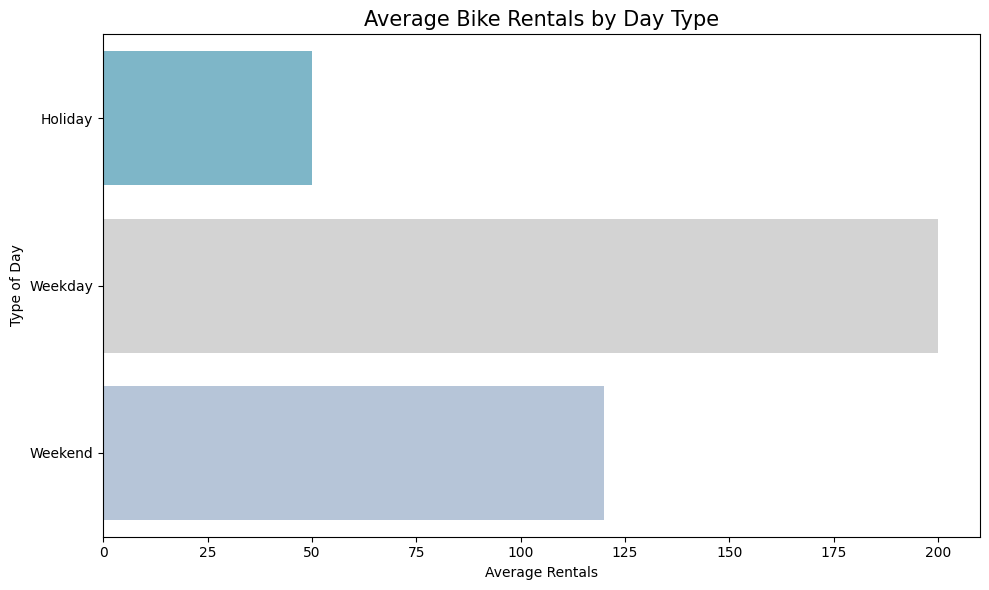

In [63]:
data = {'day_type': ['Holiday', 'Weekday', 'Weekend'], 'cnt_y': [50, 200, 120]}
All_df = pd.DataFrame(data)
average_rentals = All_df.groupby("day_type", observed=False)["cnt_y"].mean().reset_index()
average_rentals.columns = ['Type of Day', 'Average Rentals']
plt.figure(figsize=(10, 6))
sns.barplot(y='Type of Day', x='Average Rentals', data=average_rentals, palette=["#72BCD4", "#D3D3D3", "#B0C4DE"], hue='Type of Day', legend=False)
plt.ylabel("Type of Day")
plt.xlabel("Average Rentals")
plt.title("Average Bike Rentals by Day Type", fontsize=15)
plt.tight_layout()
plt.show()

## Insight
---
*   The horizontal bar chart illustrates that regular weekdays have the highest average bike rentals, indicating strong demand for commuting and leisure activities during these days.
*   The average rentals on holidays are significantly lower than on working days. This suggests potential for targeted marketing strategies to increase bike usage during holidays.



# **Conclusion**

Season with Highest Rentals: The summer season recorded the highest bike rentals throughout the year, with a total of 5,929 rentals. This peak reflects favorable weather conditions and increased outdoor activities, making summer an ideal time for biking.

Difference in Average Rentals: The analysis reveals notable differences in average bike rentals: holidays had an average of 16 rentals, while regular weekdays saw a significant increase to 40 rentals. Working days averaged 15.33 rentals. This indicates that regular weekdays are the most popular for bike rentals, suggesting that people prefer biking for commuting or leisure during the workweek.







In [68]:
All_df.to_csv("hasil_analisis.csv", index=False)

In [69]:
from google.colab import files

# Mengunduh file CSV
files.download("hasil_analisis.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>